In [608]:
import pandas as pd
pd.set_option('display.max_columns', 300)

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')   
import scipy.stats as stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
from geopy.distance import great_circle
from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts


In [609]:
listing_df = pd.read_csv('listings.csv')

In [610]:
crime_df = pd.read_csv('SA_crime_ward.csv')

In [611]:
crime_df.drop(111, inplace = True)

In [667]:
listing_df = listing_df[listing_df['price_usd'] >= 3000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,total_10000 _rounded,distance_cc,distance_waterfront,distance_wine,distance_airport,price_usd_log,distance_cc_log,availability_log,availability_365_sin,price_log
5,15199,Self catering apartment,59694,Alexa,115,-33.91044,18.41239,124995,14,2,...,NaN,1.203734,0.663044,27.195878,1.203734,9.080677,0.185428,5.897154,-0.412091,11.736029
1647,5391764,Luxus- The Lap of Luxury,953634,Simona,54,-33.94401,18.37794,89992,1,2,...,182.0,2.957263,3.708038,28.161445,2.957263,8.752124,1.084264,5.823046,-0.961389,11.407476
3319,9337739,Constantia Views,2789205,Martin,62,-34.00614,18.42492,60955,5,1,...,222.0,5.613346,7.089367,24.429044,5.613346,8.362539,1.725147,4.369448,-0.444113,11.017891
3812,9896277,The Penthouse,221078,Alexis,115,-33.90467,18.39908,74992,10,0,...,NaN,2.002956,1.230566,28.056085,2.002956,8.569784,0.694624,5.899897,0.544046,11.225137
4410,11030375,Palm House Villa,1647839,Ilsa,74,-34.00617,18.34382,54216,7,0,...,235.0,7.259082,8.338896,28.995602,7.259082,8.245379,1.982253,5.153292,-0.210811,10.900731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,42577012,Villa Mirage,198144572,Anastasia,74,-34.01273,18.33733,97998,1,0,...,235.0,7.845263,8.920355,29.290263,7.845263,8.837350,2.059910,4.317488,-0.387782,11.492702
23777,42946068,Pink Room,133671638,Lauralee,74,-34.05395,18.33855,156742,1,0,...,235.0,10.174669,11.400041,28.927578,10.174669,9.307004,2.319901,5.379897,-0.228082,11.962356
23914,43146099,Experience African Culture and African Food,343509190,Ntombi,92,-34.03016,18.66199,182616,2,0,...,259.0,15.449114,16.369511,10.843568,15.449114,9.459788,2.737552,5.899897,0.544046,12.115141
23946,43196603,Elegant Double Standard Room in Cape Town,194230296,Stay.Live.Grow,57,-33.93646,18.47019,287442,1,0,...,242.0,2.760319,3.642993,23.434199,2.760319,9.913424,1.015346,4.941642,0.980240,12.568776


In [612]:
listing_df.drop(4957, inplace = True)

In [613]:
listing_df[listing_df['minimum_nights'] == 1125]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6194,14937323,"Pied a terre,views , chic central",63403205,Manuela,NaN,Ward 115,-33.91182,18.41313,Entire home/apt,1004,1125,1,2019-02-10,0.06,3,0


In [614]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [615]:
# Ward 112 impute mean from surounding wards (Ward 103, Ward 21, Ward 70 = 175)
# Ward 113  impute mean from surounding wards (Ward 107, Ward 1, Ward 4 = 237)
# Ward 115  impute mean from surounding wards (Ward 54, Ward 57, Ward 77, Ward 55 = 266)
# Ward 116  impute mean from surounding wards (Ward 87, Ward 18, Ward 35, Ward 76, Ward 92, Ward 79, Ward 78 = 265)

In [617]:
listing_df['total_10000 _rounded'] = np.where((listing_df['neighbourhood'] == 112), 175, listing_df['total_10000 _rounded'])

KeyError: 'total_10000 _rounded'

In [566]:
listing_df['total_10000 _rounded_y'] = np.where((listing_df['neighbourhood'] == 113), 237, listing_df['total_10000 _rounded_y'])
listing_df['total_10000 _rounded_y'] = np.where((listing_df['neighbourhood'] == 115), 266, listing_df['total_10000 _rounded_y'])
listing_df['total_10000 _rounded_y'] = np.where((listing_df['neighbourhood'] == 116), 265, listing_df['total_10000 _rounded_y'])

In [618]:
pd.set_option('display.max_columns', 20)

In [619]:
listing_df[listing_df.neighbourhood == 116]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [620]:
listing_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [621]:
listing_df.shape

(24078, 16)

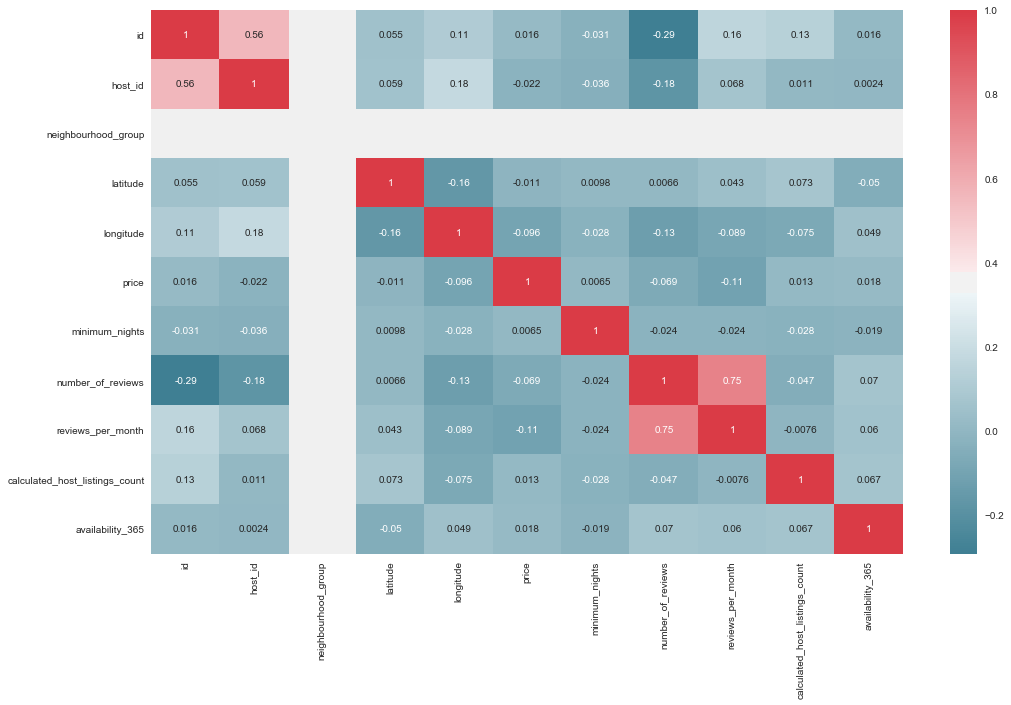

In [622]:
# Baseline Correlation heatmap 

def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(listing_df)

In [623]:
listing_df = listing_df[listing_df.columns.drop('neighbourhood_group')]

In [624]:
#because the data set is over 24k, I decided to drop the nan values of reviews and last review (the same rows were nan for each)
#listing_df.fillna(subset = ['reviews_per_month', 'last_review'], axis = 0, inplace = True)



In [625]:
listing_df['last_review'] = listing_df['last_review'].replace(np.nan, 0)

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [626]:
listing_df['number_of_reviews'] = listing_df['number_of_reviews'].replace(np.nan, 0)

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [627]:
#for neighbourhood_group I plan to imput values based on the Wards, grouping them by where in Capetown they are


In [628]:
#Air BNB zar conversion rate is 14.3 (current rate is 16.5)
listing_df['price_usd'] = listing_df.price.apply(lambda x: x/14.23 if x>= 3000 else x)

In [629]:

listing_df[listing_df.price_usd == 0.0]

#closed listing does not exist 9775 is 20685098
listing_df.drop(9775, inplace = True)


In [630]:
#listing append 9808 is 20736711 price is 121 USD, minimum night 7
listing_df.at[9808, 'price_usd'] = 121
listing_df.at[9808, 'minimum_nights'] = 7

In [631]:
listing_df = pd.get_dummies(listing_df, columns=['room_type'])

In [632]:
listing_df.neighbourhood = listing_df.neighbourhood.map(lambda x: x.replace('Ward', ''))

In [633]:
listing_df.neighbourhood = listing_df.neighbourhood.astype(int)

In [634]:
crime_df['geo_code'].astype(int)

0        1
1        2
2        3
3        4
4        5
      ... 
106    107
107    108
108    109
109    110
110    111
Name: geo_code, Length: 111, dtype: int64

In [635]:
listing_df = listing_df.merge(crime_df, left_on='neighbourhood', right_on = 'geo_code' ,how='left')


In [636]:
#distance from city center
# 33.9249° S, 18.4241° E cape town city center


In [637]:
# city center -33.9249, 18.4241
# VA Water Front -33.9036, 18.4205
# Wine Lands -34.075691, 18.843266
# Airport -33.9715, 18.6021


from geopy.distance import great_circle
city_center = (-33.9249,18.4241)
listing_df['distance_cc'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(city_center, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)



In [638]:
va_water = (-33.9036, 18.4205)
listing_df['distance_waterfront'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(va_water, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [639]:
wine_lands = (-34.075691, 18.843266)
listing_df['distance_wine'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(wine_lands, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [640]:
airport = (-33.9249,18.4241)
listing_df['distance_airport'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(airport, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [641]:
listing_df['price_usd_log'] = np.log(listing_df['price_usd'])

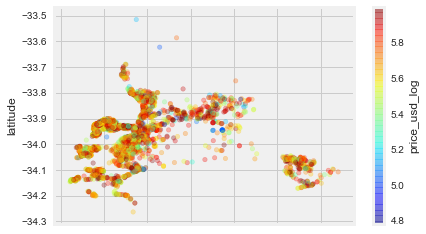

In [642]:
listing_df[listing_df['price_usd_log'].lt(6)].plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd_log', cmap = plt.get_cmap('jet'))

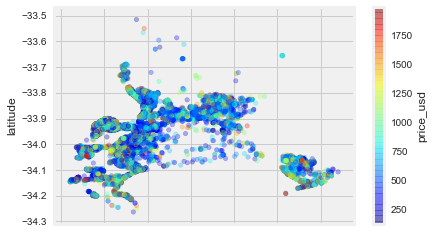

In [643]:
listing_df[listing_df['price_usd'].lt(2000)].plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd', cmap = plt.get_cmap('jet'))

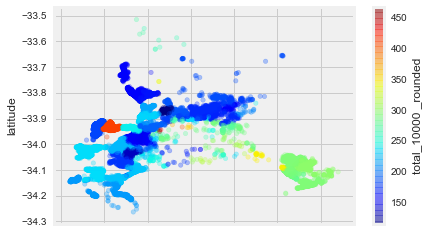

In [669]:
listing_df.plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'total_10000 _rounded', cmap = plt.get_cmap('jet'));

In [ ]:
sns.distplot(listing_df[listing_df['minimum_nights'] > 7]['minimum_nights'])

In [ ]:
sns.distplot(listing_df['distance_cc'])

In [ ]:
#sns.jointplot(x = listing_df[listing_df['minimum_nights'] > 7]['minimum_nights'],
             #  y = listing_df[listing_df['minimum_nights'] > 7]['price_usd_log'])

In [ ]:
# ANOVA
# room_type_Entire home/apt
# distance_cc

# price_usd

In [ ]:
listing_df['minimum_nights'] = listing_df['minimum_nights'].astype(int)
listing_df['price_usd'] = listing_df['price_usd'].astype(int)

In [645]:
# minimum nights > 4
# min nights < 4 
# mean min_nights is 3.93
# Prices of Air BNBs with less than 4 minimum nights is statistically different than houses with minimum nights greater or equal to 4. 
#2 sample ttest

stats.ttest_ind(listing_df[listing_df['minimum_nights'] >= 4]['price_usd_log'], listing_df[listing_df['minimum_nights'] < 4]['price_usd_log']) 


Ttest_indResult(statistic=1.4755604157332152, pvalue=0.14007501596877572)

In [656]:
# As we get closer the the City Center, the mean of the price changes. 
#WORK ON THIS ONE 

x = listing_df[listing_df['distance_cc'] >= 10]['price_usd_log']
y = listing_df[(listing_df['distance_cc'] > 8) & (listing_df['distance_cc'] < )]['price_usd_log']
z = listing_df[(listing_df['distance_cc'] >= 1) & (listing_df['distance_cc'] < 1)]['price_usd_log']
ten_miles = stats.f_oneway(x, y, z)

x = listing_df[listing_df['distance_cc'] >= 8]['price_usd_log']
y = listing_df[listing_df['distance_cc'] < 8]['price_usd_log']
eight_miles = stats.f_oneway(x, y)

x = listing_df[listing_df['distance_cc'] >= 1]['price_usd_log']
y = listing_df[listing_df['distance_cc'] < 1]['price_usd_log']
one_mile = stats.f_oneway(x, y)

print('10 miles: ', ten_miles)
print('8 miles: ', eight_miles)
print('1 mile: ', one_mile)


SyntaxError: invalid syntax (<ipython-input-656-410e5b1e70c8>, line 5)

In [652]:
stats.ttest_ind(listing_df[listing_df['distance_cc'] < 1]['price'], listing_df[listing_df['distance_cc'] >= 1]['price_usd']) 

Ttest_indResult(statistic=26.493062275534765, pvalue=1.7867325750812174e-152)

In [655]:
stats.ttest_ind(listing_df[listing_df['total_10000 _rounded'] >= 235.17]['price'], listing_df[listing_df['total_10000 _rounded'] <235.17]['price'])

Ttest_indResult(statistic=-7.566427942326695, pvalue=4.007630900879912e-14)

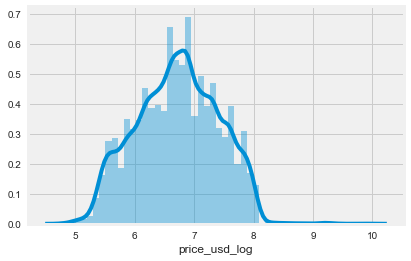

In [649]:
sns.distplot(listing_df['price_usd_log'])


In [650]:
listing_df['distance_cc_log'] = np.log(listing_df['distance_cc'])

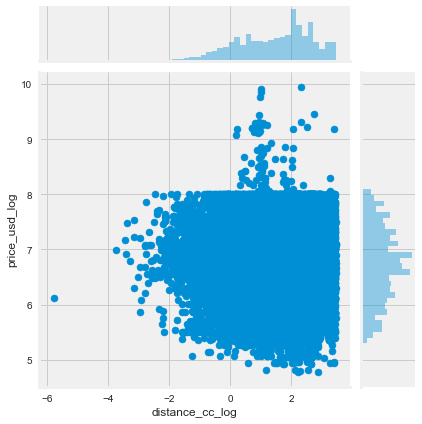

In [651]:
sns.jointplot(x = 'distance_cc_log', y = 'price_usd_log', data = listing_df);

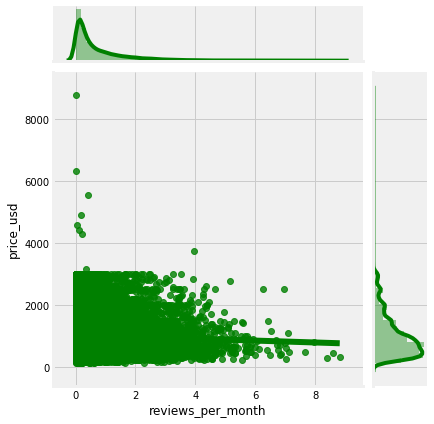

In [278]:
sns.jointplot(x = 'reviews_per_month', y = 'price_usd', data = listing_df, kind = 'reg', color = 'green');

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


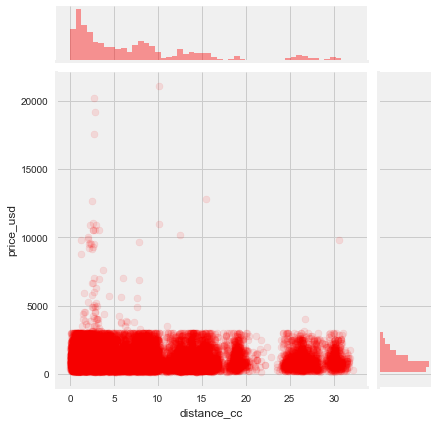

In [657]:
listing_df['availability_log'] = np.log(listing_df['availability_365'])
listing_df['availability_365_sin'] = np.sin(listing_df['availability_365'])
listing_df['price_log'] = np.log(listing_df['price'])

sns.jointplot(x = 'distance_cc', y = 'price_usd', data = listing_df, kind = 'scatter', color = 'red', alpha = 0.1);


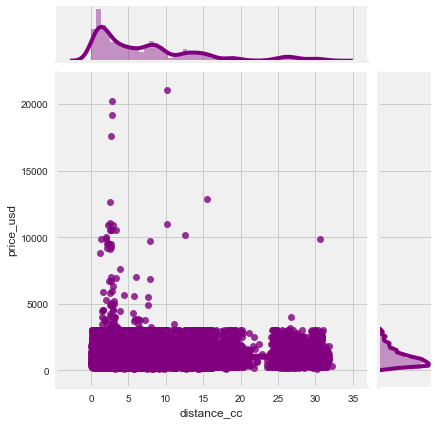

In [658]:
sns.jointplot(x = 'distance_cc', y = 'price_usd', data = listing_df, kind = 'reg', color = 'purple');

In [661]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_usd', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'geo_level', 'geo_code', '0_14', '15_24',
       '25_34', '35_44', '45_54', '55_64', '65+', 'total_raw',
       'total_10000 _rounded', 'distance_cc', 'distance_waterfront',
       'distance_wine', 'distance_airport', 'price_usd_log', 'distance_cc_log',
       'availability_log', 'availability_365_sin', 'price_log'],
      dtype='object')

In [660]:
listing_df.price_usd.describe()

count    24077.000000
mean      1041.737721
std        792.416931
min        119.000000
25%        505.000000
50%        846.000000
75%       1393.000000
max      21082.782853
Name: price_usd, dtype: float64

In [665]:
# baseline model: 693.3257724308925 r2:  -0.07212491057954762

subset = ['neighbourhood', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
x = listing_df[subset]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "median")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(y)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)


rmse:  816.2179663871882 r2:  -0.061018229428942306


In [437]:
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

692.9463643984295

In [666]:
#2nd baseline 
subset2 = ['neighbourhood', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
x = listing_df[subset2]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "mean")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(x)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)

rmse:  792.4004752153407 r2:  0.0


In [439]:
641

641

In [440]:
# bin the availability

In [441]:
#CORR CHECK 

In [442]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'geo_level_x',
       'geo_code_x', '0_14_x', '15_24_x', '25_34_x', '35_44_x', '45_54_x',
       '55_64_x', '65+_x', 'total_raw_x', 'total_10000 _rounded_x',
       'distance_cc', 'distance_waterfront', 'distance_wine',
       'distance_airport', 'price_usd_log', 'distance_cc_log',
       'availability_log', 'availability_365_sin', 'price_log', 'geo_level_y',
       'geo_code_y', '0_14_y', '15_24_y', '25_34_y', '35_44_y', '45_54_y',
       '55_64_y', '65+_y', 'total_raw_y', 'total_10000 _rounded_y'],
      dtype='object')

In [443]:
corr_check = listing_df.corr()

In [662]:
corr_check['total_10000 _rounded_y'] 

# neighbourhood = no conflicts
# latitude = no conflicts
# longitude = over .7 with distance airport, cc, waterfront
# number of reviews = over .7 reviews_per_month 
# availability 365 = over .7 availability log 
# entire house no conflicts 
# distance cc conflicts with distance waterfront and longitude 
# distance airport -.7 with wine distance?

id                               -0.018893
host_id                          -0.042568
neighbourhood_group                    NaN
neighbourhood                     0.378236
latitude                         -0.110180
longitude                         0.052251
price                            -0.053071
minimum_nights                    0.015044
number_of_reviews                 0.077653
reviews_per_month                 0.073819
calculated_host_listings_count    0.041839
availability_365                 -0.056855
price_usd                         0.025626
room_type_Entire home/apt         0.025159
room_type_Hotel room             -0.016064
room_type_Private room           -0.023092
room_type_Shared room             0.009479
geo_code_x                        0.346634
0_14_x                            0.497876
15_24_x                           0.856040
25_34_x                           0.875416
35_44_x                           0.952689
45_54_x                           0.908351
55_64_x    

In [445]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'geo_level_x',
       'geo_code_x', '0_14_x', '15_24_x', '25_34_x', '35_44_x', '45_54_x',
       '55_64_x', '65+_x', 'total_raw_x', 'total_10000 _rounded_x',
       'distance_cc', 'distance_waterfront', 'distance_wine',
       'distance_airport', 'price_usd_log', 'distance_cc_log',
       'availability_log', 'availability_365_sin', 'price_log', 'geo_level_y',
       'geo_code_y', '0_14_y', '15_24_y', '25_34_y', '35_44_y', '45_54_y',
       '55_64_y', '65+_y', 'total_raw_y', 'total_10000 _rounded_y'],
      dtype='object')

In [446]:
subset3 = ['minimum_nights','number_of_reviews', 'neighbourhood', 'availability_365', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room','room_type_Shared room', 'distance_cc', 
           'distance_airport', 'distance_wine', 'total_10000 _rounded_y']


df_features = listing_df[subset3]
target = listing_df['price_usd_log']
len(subset3)

12

In [447]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2, include_bias = False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
model2 = LinearRegression()

model2 = model2.fit(df_poly2, target)

In [448]:
model2 = sm.OLS(y, poly2_data).fit()
model2.summary()

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     29.38
Date:                Thu, 30 Jul 2020   Prob (F-statistic):          5.60e-307
Time:                        14:45:23   Log-Likelihood:            -1.3592e+05
No. Observations:               17254   AIC:                         2.720e+05
Df Residuals:                   17194   BIC:                         2.724e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.7827     20.096      0.686      0.493     -25.608      53.173
x2            -4.9019      2.750     -1.783      0.075     -10.292       0.488
x3             7.1884      3.071      2.341      0.019       1.169      13.208
x4            -0.7709      0.318     -2.426      0.015      -1.394      -0.148
x5          -608.7018    234.100     -2.600      0.009   -1067.561    -149.843
x6          -178.3575    350.724     -0.509      0.611    -865.812     509.097
x7          -856.1848    234.449     -3.652      0.000   -1315.729    -396.641
x8         -1239.6978    536.381     -2.311      0.021   -2291.059    -188.336
x9            22.2054      7.397      3.002      0.003       7.707      36.704
x10           22.2054      7.397      3.002      0.003       7.707      36.704
x11          103.4197     20.004      5.170      0.000      64.209     142.630
x12           -0.4411      1.330     -0.332      0.740      -3.047       2.165
x13           -0.0023      0.001     -1.616      0.106      -0.005       0.000
x14           -0.0026      0.015     -0.171      0.864      -0.032       0.027
x15            0.0099      0.017      0.594      0.553      -0.023       0.042
x16           -0.0099      0.003     -2.901      0.004      -0.017      -0.003
x17           -3.9532     19.352     -0.204      0.838     -41.884      33.978
x18           41.0148     49.973      0.821      0.412     -56.938     138.968
x19           -8.7541     19.397     -0.451      0.652     -46.774      29.266
x20          -14.5248     61.912     -0.235      0.815    -135.878     106.829
x21           -0.0260      0.096     -0.272      0.786      -0.213       0.161
x22           -0.0260      0.096     -0.272      0.786      -0.213       0.161
x23           -0.2634      0.207     -1.271      0.204      -0.670       0.143
x24           -0.0048      0.008     -0.629      0.529      -0.020       0.010
x25            0.0063      0.002      3.653      0.000       0.003       0.010
x26            0.0043      0.006      0.696      0.487      -0.008       0.016
x27            0.0032      0.001      2.610      0.009       0.001       0.006
x28           -2.8014      2.427     -1.154      0.248      -7.558       1.955
x29            4.2386      3.148      1.346      0.178      -1.932      10.409
x30           -3.4557      2.447     -1.412      0.158      -8.252       1.341
x31           -2.8834      9.372     -0.308      0.758     -21.254      15.487
x32           -0.0140      0.019     -0.750      0.453      -0.051       0.023
x33           -0.0140      0.019     -0.750      0.453      -0.051       0.023
x34            0.1784      0.048      3.694      0.000       0.084       0.273
x35         9.934e-05      0.002      0.041      0.967      -0.005       0.005
x36           -0.0253      0.007     -3.392      0.001      -0.040      -0.011
x3

In [689]:
from sklearn.preprocessing import PolynomialFeatures

poly_3 = PolynomialFeatures(degree=3, include_bias = False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
model3 = LinearRegression()

model3 = model3.fit(df_poly3, target)
model3 = sm.OLS(y, poly3_data).fit()
model3.summary()

ValueError: endog and exog matrices are different sizes

In [452]:
#using sklearn.model_selection we will be using the train test split
#we name them as xtrain and ytrain then xtest and ytest
from sklearn.model_selection import train_test_split

#scale data 
scaler = StandardScaler()
x_standin = scaler.fit_transform(df_features)
x_standin = pd.DataFrame(data = target, columns = df_features.columns)

x_train, x_test, y_train, y_test = train_test_split(df_features, target, random_state = 42, test_size=0.2)

print('Training set - Features:', x_train.shape, 'Target:', y_train.shape)
print('Training set - Features:', x_test.shape, 'Target:', y_test.shape)

Training set - Features: (13803, 12) Target: (13803,)
Training set - Features: (3451, 12) Target: (3451,)


In [453]:


model_lr = LinearRegression()
model_lr = model_lr.fit(x_train, y_train)
y_train_pred = model_lr.predict(x_train)
y_test_pred = model_lr.predict(x_test)

y = listing_df['price_usd']
x = df_features



In [454]:
y.describe()


count    17254.000000
mean      1009.869306
std        669.615593
min        119.000000
25%        505.000000
50%        831.500000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [455]:
df_features

,minimum_nights,number_of_reviews,neighbourhood,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc,distance_airport,distance_wine,total_10000 _rounded_y
0,3,54,57,362,1,0,0,0,3.356482,3.356482,22.826170,242.0
1,2,27,23,251,1,0,0,0,8.879955,8.879955,29.050059,157.0
2,5,5,4,208,0,0,1,0,5.980151,5.980151,25.194771,215.0
3,14,2,115,364,1,0,0,0,1.203734,1.203734,27.195878,266.0
4,2,8,71,303,1,0,0,0,7.868755,7.868755,23.721691,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17249,1,2,115,330,1,0,0,0,0.506106,0.506106,26.620631,266.0
17250,1,2,2,77,1,0,0,0,11.165350,11.165350,17.867290,178.0
17251,2,1,54,343,1,0,0,0,2.326342,2.326342,28.350356,182.0
17252,1,1,5,172,1,0,0,0,7.933913,7.933913,21.672786,114.0


In [456]:
out = listing_df.reset_index(drop=True).T.drop_duplicates().T.set_index(listing_df.index)


In [457]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17254 entries, 0 to 17253
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   minimum_nights             17254 non-null  int64  
 1   number_of_reviews          17254 non-null  int64  
 2   neighbourhood              17254 non-null  int64  
 3   availability_365           17254 non-null  int64  
 4   room_type_Entire home/apt  17254 non-null  uint8  
 5   room_type_Hotel room       17254 non-null  uint8  
 6   room_type_Private room     17254 non-null  uint8  
 7   room_type_Shared room      17254 non-null  uint8  
 8   distance_cc                17254 non-null  float64
 9   distance_airport           17254 non-null  float64
 10  distance_wine              17254 non-null  float64
 11  total_10000 _rounded_y     17254 non-null  float64
dtypes: float64(4), int64(4), uint8(4)
memory usage: 1.3 MB


In [458]:

y = listing_df['price_usd_log']
x= df_features
x= sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

In [459]:
df_features.columns

Index(['minimum_nights', 'number_of_reviews', 'neighbourhood',
       'availability_365', 'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_airport', 'distance_wine', 'total_10000 _rounded_y'],
      dtype='object')

In [460]:
#calculate training errors
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse


Mean Absolute Error: 0.5114203138950766
Mean Squared Error: 0.4038749545568536
Root Mean Squared Error: 0.6355115691762453


1003.1663006158071

In [461]:
#calculte test errors 
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 0.5113853893683937
Mean Squared Error: 0.40287046726024284
Root Mean Squared Error: 0.6347207789731188


In [462]:
model3 = LinearRegression()
model3 = model3.fit(x_train, y_train)
y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)

In [676]:
train_rmse = metrics.mean_absolute_error(np.exp(y_train),np.exp(y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse))

rmse = np.sqrt(metrics.mean_squared_error(np.exp(y), np.exp(y_predict)))
rmse

Training Error: 501.62487611041905
Testing Error: 683.7623573093935


/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [678]:
y_pred

array([6.70317783, 6.70317783, 6.70317783, ..., 6.70317783, 6.70317783,
       6.70317783])

In [464]:

lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(x_train,y_train)
y_train_pred = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

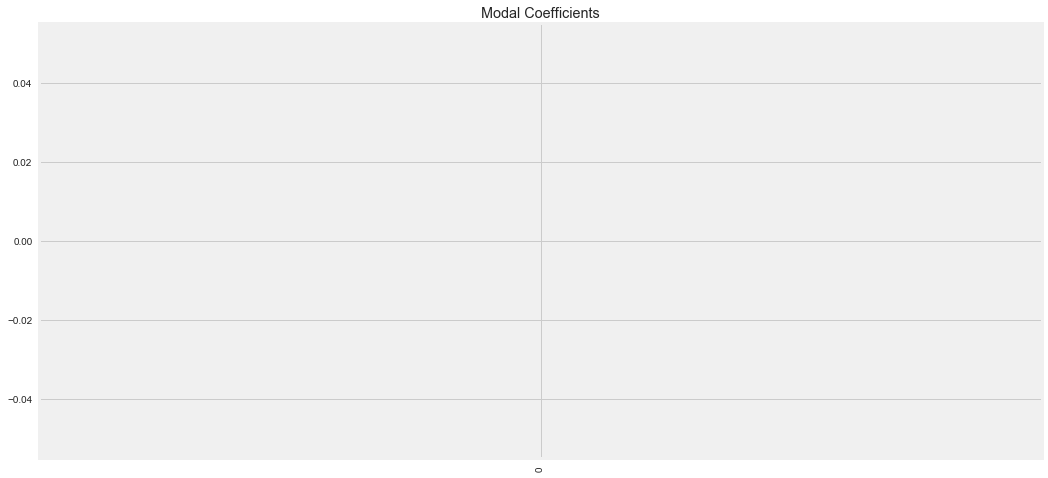

In [465]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = x_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))


In [466]:
# LASSO MODEL

lasso1 = Lasso(alpha=.1, normalize=False)
lasso1.fit(x_train,y_train)

y_train_lasso1 = lasso1.predict(x_train)
y_pred_lasso1 = lasso1.predict(x_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )


Training Error: 0.5442164084222535
Testing Error: 0.669608049021729


In [ ]:
# drop over 3000
# reviews, dont drop, include of missing data point 
# find influential outliers with residual vis 
# relog/undo log transformation with exponentiating price before getting rmse 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_3 = PolynomialFeatures(degree=3, include_bias = False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
model3 = LinearRegression()

model3 = model3.fit(df_poly3, target)


In [ ]:
model3 = sm.OLS(y, poly3_data).fit()
model3.summary()

In [681]:
df_poly3

,minimum_nights,number_of_reviews,neighbourhood,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc,distance_airport,...,distance_airport^3,distance_airport^2 distance_wine,distance_airport^2 total_10000 _rounded_y,distance_airport distance_wine^2,distance_airport distance_wine total_10000 _rounded_y,distance_airport total_10000 _rounded_y^2,distance_wine^3,distance_wine^2 total_10000 _rounded_y,distance_wine total_10000 _rounded_y^2,total_10000 _rounded_y^3
0,3.0,54.0,57.0,362.0,1.0,0.0,0.0,0.0,3.356482,3.356482,...,37.814036,257.159005,2726.365357,1748.841462,18540.983128,196569.021730,11893.211583,126090.237498,1.336792e+06,14172488.0
1,2.0,27.0,23.0,251.0,1.0,0.0,0.0,0.0,8.879955,8.879955,...,700.216375,2290.701618,12380.014713,7493.846318,40500.223579,218882.005379,24515.516206,132493.227833,7.160549e+05,3869893.0
2,5.0,5.0,4.0,208.0,0.0,0.0,1.0,0.0,5.980151,5.980151,...,213.863443,901.020721,7688.875522,3796.059427,32393.737139,276432.502186,15993.047473,136476.940329,1.164628e+06,9938375.0
3,14.0,2.0,115.0,364.0,1.0,0.0,0.0,0.0,1.203734,1.203734,...,1.744179,39.406136,385.427229,890.300382,8707.933538,85171.373610,20114.501443,196737.803514,1.924272e+06,18821096.0
4,2.0,8.0,71.0,303.0,1.0,0.0,0.0,0.0,7.868755,7.868755,...,487.212104,1468.783208,10959.363007,4427.895151,33038.851517,246520.225142,13348.638086,99601.200260,7.431769e+05,5545233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17249,1.0,2.0,115.0,330.0,1.0,0.0,0.0,0.0,0.506106,0.506106,...,0.129635,6.818689,68.134043,358.655882,3583.779216,35810.017706,18864.923227,188503.028231,1.883569e+06,18821096.0
17250,1.0,2.0,2.0,77.0,1.0,0.0,0.0,0.0,11.165350,11.165350,...,1391.928804,2227.426420,22190.377153,3564.426888,35510.029099,353762.948781,5703.954540,56824.728930,5.661072e+05,5639752.0
17251,2.0,1.0,54.0,343.0,1.0,0.0,0.0,0.0,2.326342,2.326342,...,12.589856,153.428379,984.959940,1869.780501,12003.378368,77057.757387,22786.391525,146281.169859,9.390772e+05,6028568.0
17252,1.0,1.0,5.0,172.0,1.0,0.0,0.0,0.0,7.933913,7.933913,...,499.415872,1364.236398,7175.955638,3726.635562,19602.300239,103109.136451,10179.916495,53546.899402,2.816595e+05,1481544.0


In [690]:
y.shape

(24077,)

In [691]:
x.shape

(17254, 454)

In [692]:
y = listing_df['price_usd_log']
x = df_poly3

In [693]:
X_train, X_test, y_train, y_test = train_test_split(df_poly3, y,random_state = 42, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [17254, 24077]